## Exponential decay process 

Demonstration: 
1. Counting data from a exponentially decaying process
2. Exponential model
3. Maximum likelihood 
4. Poisson error distribution.
5. AmoebaFitter with several other error distributions.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import ExpModel
from BayesicFitting import PolynomialModel
from BayesicFitting import PoissonErrorDistribution
from BayesicFitting import AmoebaFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import printclass
import matplotlib.pyplot as plt


define some constants

In [2]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

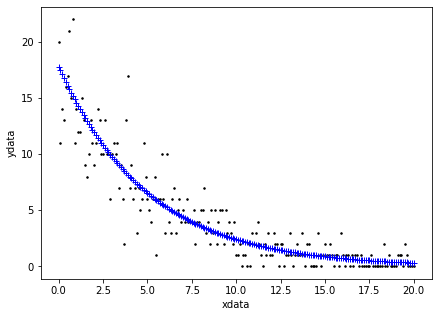

In [3]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

numpy.random.seed( 3456 )
#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
# plot the data along with the "truth"
plotFit( x, y, show=False )
plt.plot( x, ym, 'b+')
plt.show()

Define the model

In [4]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: AmoebaFitter with error distribution

In [5]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

# show all attributes of the fitter class 
printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
accuracy        None
chisq           702.0609092696214
errdis          poisson
fitIndex        None
fitWgts         1.0
fixedScale      None
imageAssistant  None
isChisq         False
iter            34
keep            None
landscape       _LogL
logLikelihood   -347.1246286740039
maxIter         2000
model           Exp
ndim            1
npfit           2
ntrans          68
nxdata          201
plotfreq        0
plotter         IterationPlotter
power           2.0
simplex         [  ]
sumwgt          201
tolerance       0.0001
tooLarge        100
values          [347.125 347.125 347.125]
verbose         1
weights         None
xdata           [ 0.   0.1  0.2  0.3 ... 19.7 19.8 19.9 20. ] 201


In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )

Parameters : [   17.114   -0.194]
StDevs     : [    7.279    0.119]
Chisq      :   702.061
Scale      :    26.496
Evidence   :  -157.616


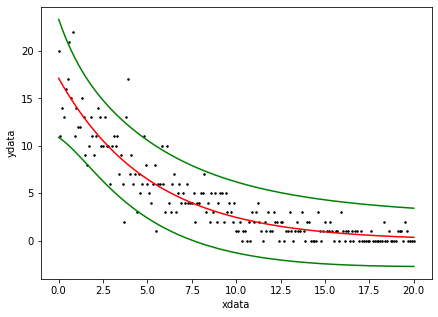

In [7]:
plotFit( x, data=y, model=mdl, fitter=fitter )

In [8]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   16.705   -0.187]   699.308        27


In [9]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   16.705   -0.187]   699.308        26


In [10]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.026   -0.196]   702.887        38


In [11]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   16.906   -0.196]   703.205        26


In [12]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   17.110   -0.194]   701.990        22
